# MNIST (dígitos) solución tradicional

__Integrantes:__

+ Nombre: Leonardo Franco
+ Nombre: Alvaro Gómez

__Números asignados:__ 3 y 0


## Taller 

_Suponga que trabajan para el desarrollo de un sistema de lectura y reconocimiento de dígitos. Para este trabajo le han proporcionado un conjunto de fotos en grises con el fin que proponga una solución de programación tradicional, es decir, sin el uso de la inteligencia artificial. El software que proponga debe tener la capacidad de determinar con una precisión una muestra de los datos que le han suministrado_

Durante la clase se le proporcionaran dos números para trabajar:
+ 1 y 5
+ 8 y 2
+ 9 y 7
+ 0 y 3
+ 4 y 6

**Evaluación del método**

Seleccione aleatoriamente una muestra de 30% de los datos, en donde se incluya un balance entre los dígitos asignados (despliéguelo y evidencie las cantidades).

Utilice la muestra obtenida y evalué el software (proceso o métodos) que ha propuesto, es decir, a cuantos números acertó (VP) contra los que no acertó (FP), calcule los siguientes datos:

```
Para el primer número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente 

Para el segundo número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente
```
_Para todos los números que le corresponden_

$ Precision = \frac{VP}{VP+FP}$


Finalmente, despliegue el tiempo que tomo todo el proceso de evaluación.

#### Entregas

+ Prepare una presentación donde muestre los resultados
+ Envié por un correo electrónico este archivo ipynb con la solución y resultados conseguidos


#### Paquetes

In [1]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn

In [3]:
# cargamos los datos y desplegamos el objeto
digits = load_digits()
type(digits)

sklearn.utils.Bunch

In [30]:
# observe las propieades del objeto, ¿a que tipo se le parece?
?sklearn.utils.Bunch

<Figure size 432x288 with 0 Axes>

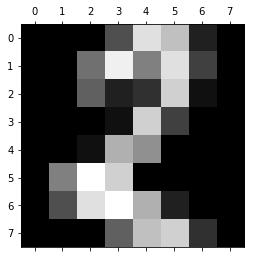

In [4]:
pl.gray() # Queremos las imágenes en grises
pl.matshow(digits.images[50]) # Imprimir una imagen dada

In [11]:
numImagenes = len(digits.images) # Numero de imagenes, len es un método que provee el tamaño del arreglo
print("Se tienen en total:", numImagenes, "imágenes")
print(digits.images[50]) # Ver su representación en pixeles

Se tienen en total: 1797 imágenes
[[ 0.  0.  0.  5. 14. 12.  2.  0.]
 [ 0.  0.  7. 15.  8. 14.  4.  0.]
 [ 0.  0.  6.  2.  3. 13.  1.  0.]
 [ 0.  0.  0.  1. 13.  4.  0.  0.]
 [ 0.  0.  1. 11.  9.  0.  0.  0.]
 [ 0.  8. 16. 13.  0.  0.  0.  0.]
 [ 0.  5. 14. 16. 11.  2.  0.  0.]
 [ 0.  0.  0.  6. 12. 13.  3.  0.]]


Observe cada atributo del objeto digits, recorra cada imagen y obtenga su representación (_target_)

In [10]:
print(digits.images[50])
print(digits.target[50])

[[ 0.  0.  0.  5. 14. 12.  2.  0.]
 [ 0.  0.  7. 15.  8. 14.  4.  0.]
 [ 0.  0.  6.  2.  3. 13.  1.  0.]
 [ 0.  0.  0.  1. 13.  4.  0.  0.]
 [ 0.  0.  1. 11.  9.  0.  0.  0.]
 [ 0.  8. 16. 13.  0.  0.  0.  0.]
 [ 0.  5. 14. 16. 11.  2.  0.  0.]
 [ 0.  0.  0.  6. 12. 13.  3.  0.]]
2


#### Solución

In [4]:
#Primera Parte.
# Recuperar 30% aleatorio de nuestras imagenes.

actual = 0
num3s = 0
num0s = 0
our_nums = sklearn.utils.Bunch(target = [], images = [])
for i in digits.target:
    if i == 3 or i == 0:
        our_nums.target.append(i)
        our_nums.images.append(digits.images[actual])
    actual+=1

print(str(len(our_nums.target)))

361


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]
[[ 0.  2.  9. 15. 14.  9.  3.  0.]
 [ 0.  4. 13.  8.  9. 16.  8.  0.]
 [ 0.  0.  0.  6. 14. 15.  3.  0.]
 [ 0.  0.  0. 11. 14.  2.  0.  0.]
 [ 0.  0.  0.  2.

0.0

<Figure size 432x288 with 0 Axes>

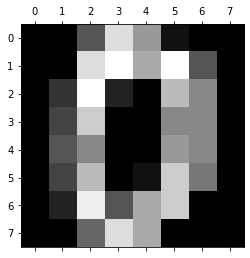

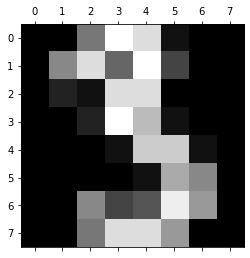

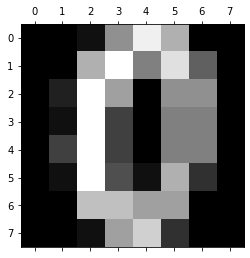

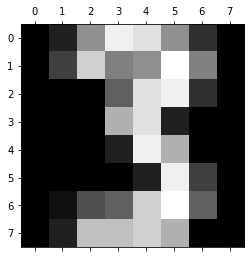

In [89]:
pl.gray() # Queremos las imágenes en grises
#for i in our_nums.images:
#    pl.matshow(i)
pl.matshow(our_nums.images[0])
print(our_nums.images[0])
pl.matshow(our_nums.images[1])
print(our_nums.images[1])
pl.matshow(our_nums.images[2])
print(our_nums.images[2])
pl.matshow(our_nums.images[3])
print(our_nums.images[3])
print(our_nums.target[3])
type(our_nums.images[0])

our_nums.images[0][0][0]

### Opciones:
#### 1. Metodo de hallar suma de sector (ver como dividir cada sector)
#### 2. Acercar los grises a negro y blanco, y usar otro criterio o el metodo anterior
#### 3. *ELEGIDO: USAR TEMPLATES. YO HAGO EL 0, TU TRATAS EL 3.*

Se define el template del digito 0.

In [70]:
temp0 = [[0,0,0,1,1,0,0,0],
         [0,0,1,1,1,1,0,0],
         [0,0,1,0,0,1,0,0],
         [0,0,1,0,0,1,0,0],
         [0,0,1,0,0,1,0,0],
         [0,0,1,0,0,1,0,0],
         [0,0,1,1,1,1,0,0],
         [0,0,0,1,1,0,0,0]]

Se define el metodo Recognize, el cual en un principio determina si el número es 0 o no.

In [74]:
def recognize(num, temp):
    digit = -1
    score = 0
    for i in range(0,8):
        for j in range(2,6):
            x = 0
            #print(num[i][j])
            if num[i][j] > 8:
                x = 1
            #print(x)
            if x == temp[i][j]:
                score += 1
            #print("score:"+str(score))
    #26--> 81% (score=26)de similitud al template ; 75% (score=24)
    #print(score)
    if score > 24:
        digit = 0
    return digit
        

In [87]:
recognize(our_nums.images[1], temp0)

-1

Se define el template para el número 3

In [9]:
temp3 = [[0,0,1,1,1,1,0,0],
         [0,0,1,0,0,1,0,0],
         [0,0,0,0,0,1,0,0],
         [0,0,0,0,1,0,0,0],
         [0,0,0,0,1,1,0,0],
         [0,0,0,0,0,1,0,0],
         [0,0,1,0,0,1,0,0],
         [0,0,1,1,1,1,0,0]]

In [60]:
recognize(our_nums.images[1], temp3)

22


-1

In [103]:
def identifyNumber(number):
    is0 = recognize(number, temp0)
    is3 = recognize(number, temp3)
    
    if(is0==0):
        #print("the number is: 0")
        return 0
    elif(is3==0):
        #print("the number is: 3")
        return 3
    else:
        #print("Number not recognized")
        return -1
    

In [84]:
identifyNumber(our_nums.images[79])

the number is: 0


In [114]:
import random

muestra = []
poblacion = len(our_nums.target)
num3=0
num0=0

aciertos0 = 0
aciertos3 = 0
noIdentificados = 0
erroneos = 0

while len(muestra)<(poblacion*0.3):
    index = random.randrange(poblacion+1)
    if index not in muestra :
        muestra.append(index)
        if(our_nums.target[index]==0):
            num0 +=1
        elif(our_nums.target[index]==3):
            num3 +=1
        

        
for i in muestra:
    
    evaluado = identifyNumber(our_nums.images[i])
    #print("target: ", our_nums.target[i])
    #print("evaluado: ", evaluado)
    if(our_nums.target[i]==0):
        if(evaluado==0):
            aciertos0 +=1
        elif(evaluado==-1):
            noIdentificados +=1
        else:
            erroneos += 1
            
    if(our_nums.target[i]==3):
        if(evaluado==3):
            aciertos3 +=1
        elif(evaluado==-1):
            noIdentificados +=1
        else:
            erroneos += 1
  
print("# 0: ", num0)
print("#3: ", num3)
print("Aciertos en 0: ", aciertos0)
print("Aciertos en 3: ", aciertos3)
print("No identificados: ", noIdentificados)
print("Erroneos: ", erroneos)


# 0:  53
#3:  56
Aciertos en 0:  40
Aciertos en 3:  15
No identificados:  54
Erroneos:  0
